In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats
import joblib


HOUSING_PATH = "C:\\Users\\Aidan Palmbos\\source\\ml\\datasets\\housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
print("----Head:----")
housing.head()

----Head:----


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
print("----Info:----")
housing.info()
print("\n----Description:----")
housing.describe()

----Info:----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

----Description:----


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
print("----Different values for ocean proximity:----")
housing["ocean_proximity"].value_counts()

----Different values for ocean proximity:----


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

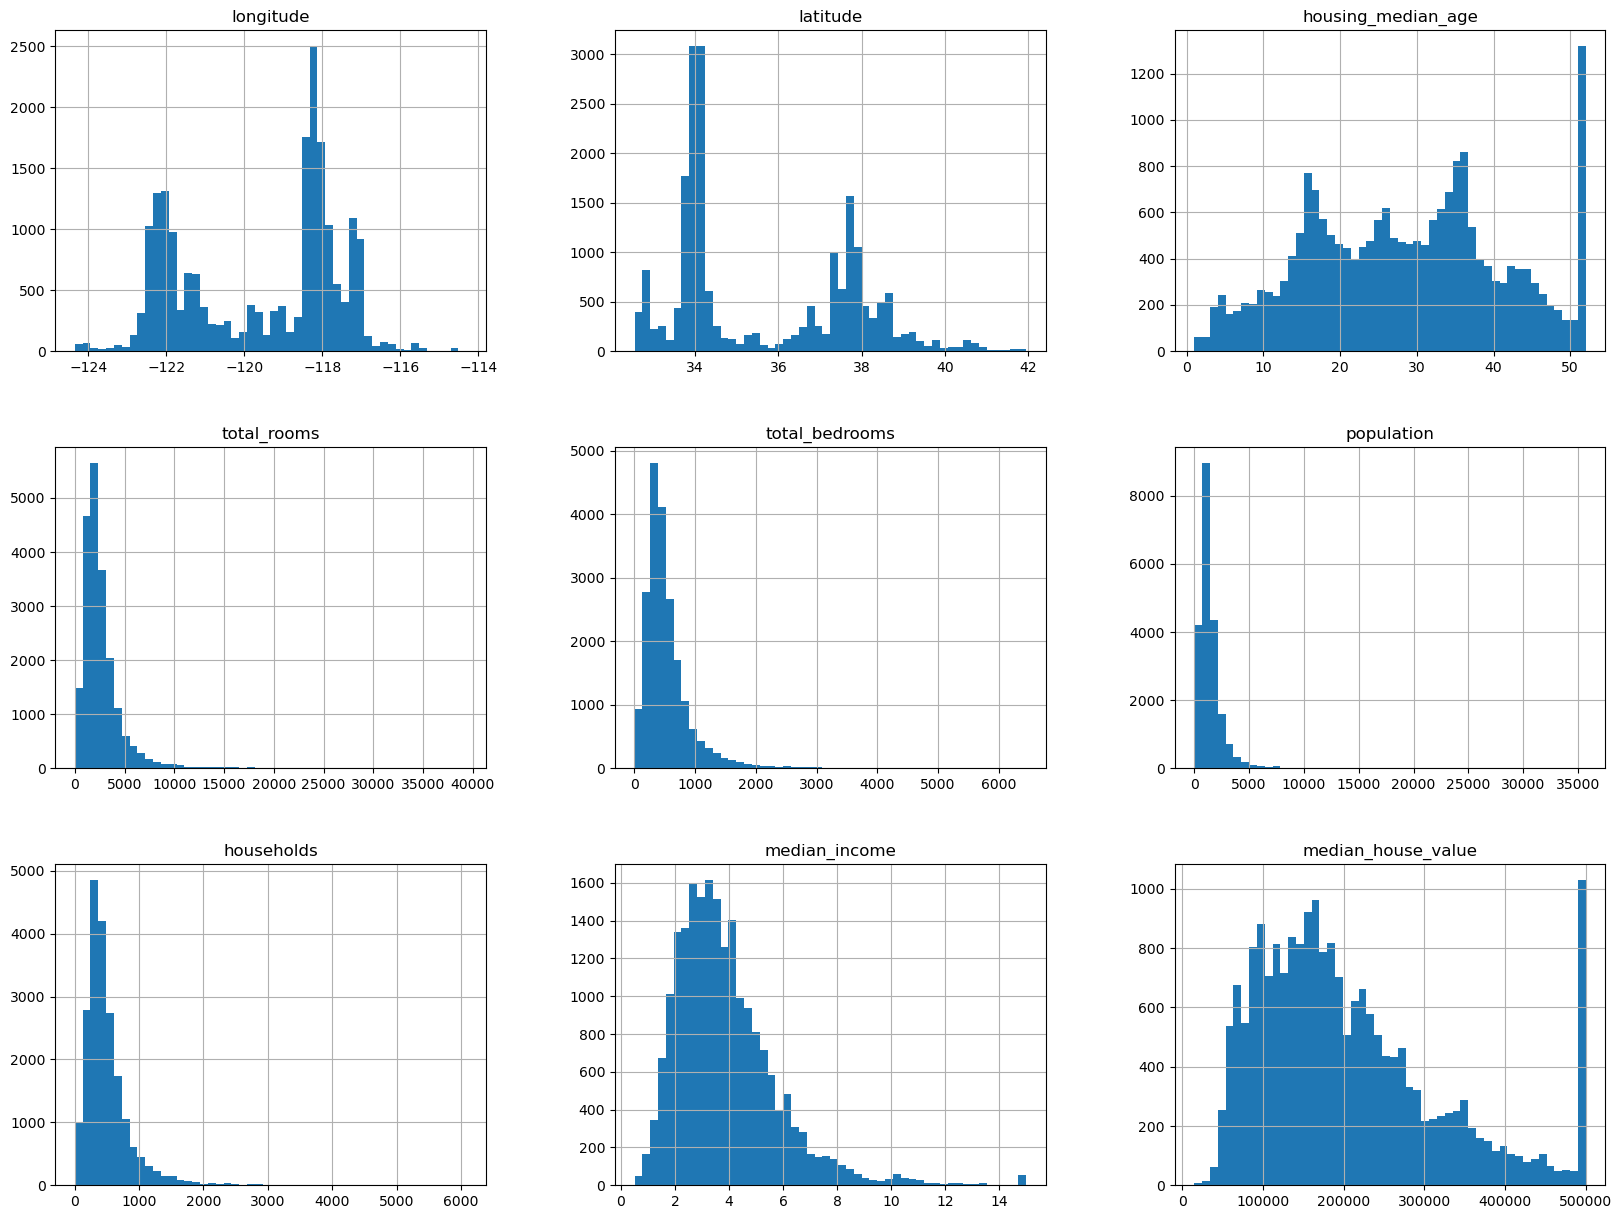

In [4]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# Alternative Data splitting options listed:
# - Custom np.random.permutation split function
# - zlib Hash split function

# Now using sklearn's train_test_split function
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Size of training data:", str(len(train_set)))
print("Size of training data:", str(len(test_set)))

Size of training data: 16512
Size of training data: 4128


<Axes: >

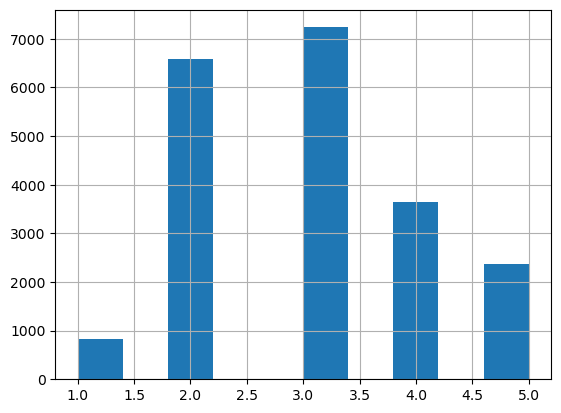

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

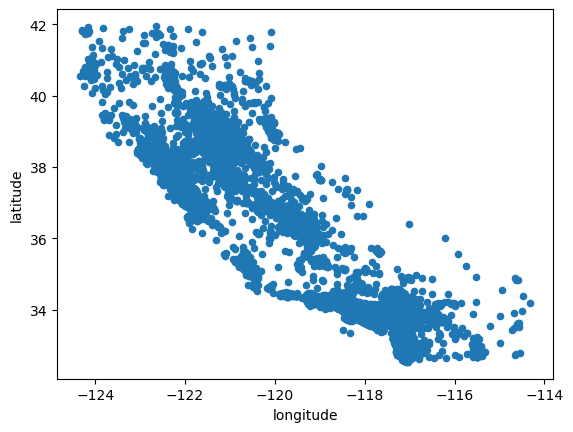

In [8]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

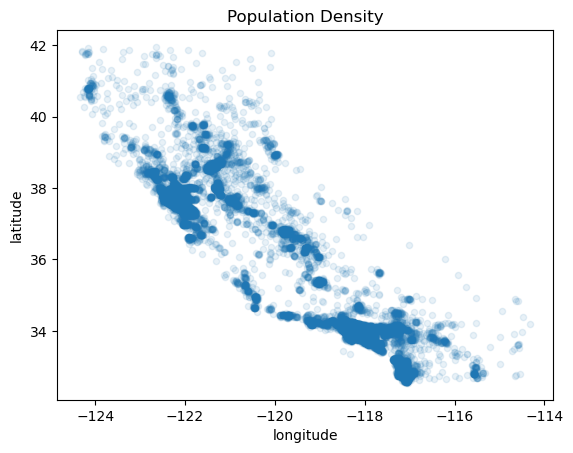

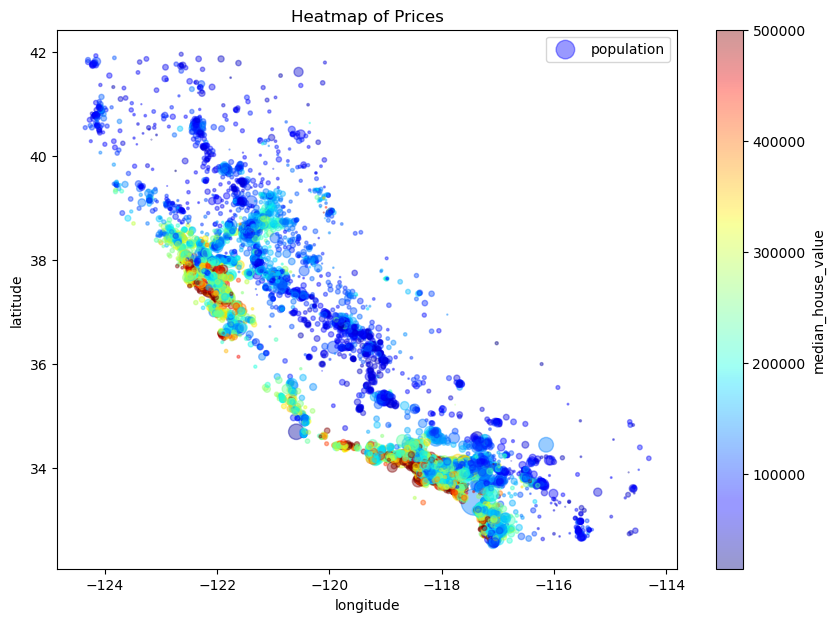

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, title="Population Density")

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, title="Heatmap of Prices")
plt.legend()

Correlation Matrix of fields in relation to Median House Value:
median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Full Visualized Correlation Matrix:


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

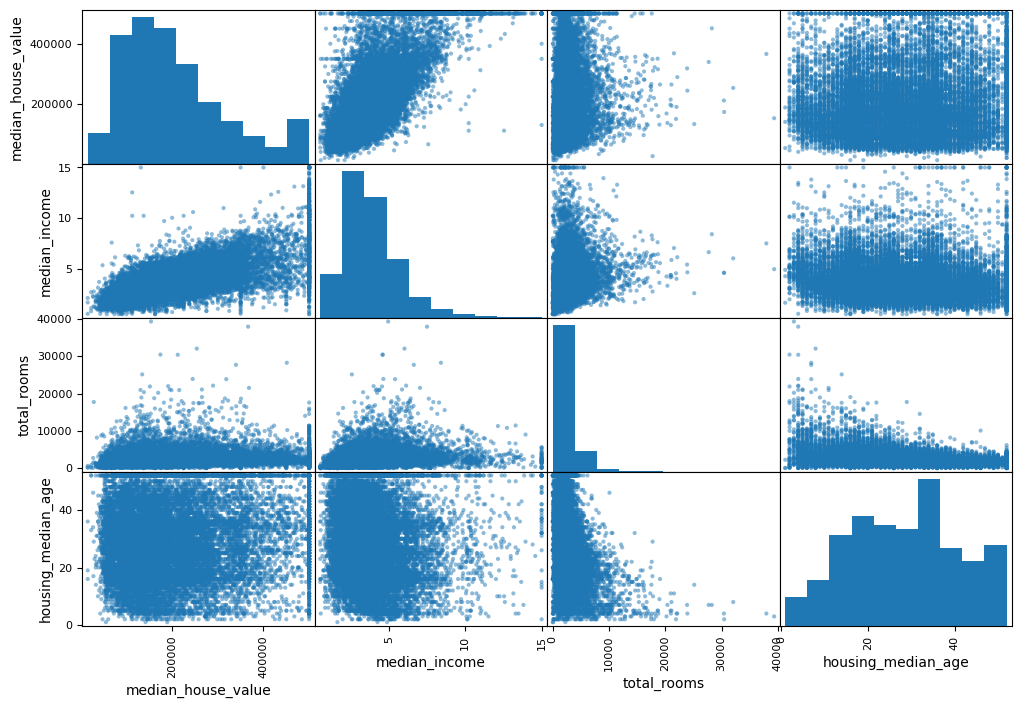

In [10]:
showcase_housing = housing.drop('ocean_proximity', axis=1)
corr_matrix = showcase_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
print("Correlation Matrix of fields in relation to Median House Value:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

print("\nFull Visualized Correlation Matrix:")
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: title={'center': 'Closer look at Median Income vs. Median House Value'}, xlabel='median_income', ylabel='median_house_value'>

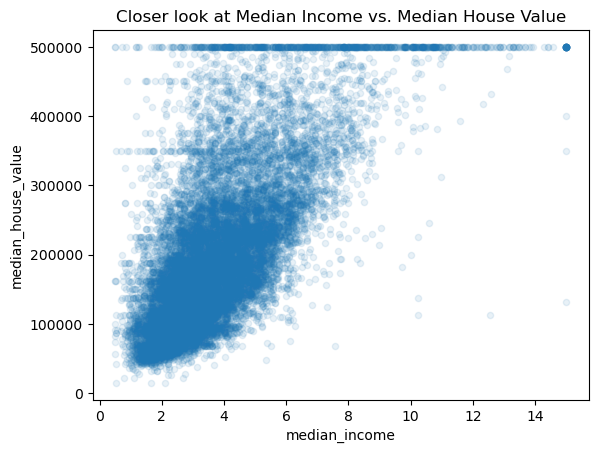

In [11]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, title="Closer look at Median Income vs. Median House Value")

In [12]:
# Compute more related data for further correlations:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
showcase_housing = housing.drop('ocean_proximity', axis=1) # Initially remove 'ocean proximity' as it's not encoded.
corr_matrix = showcase_housing.corr()
print("Updated Correlation Matrix of fields in relation to Median House Value:")
corr_matrix["median_house_value"].sort_values(ascending=False)

Updated Correlation Matrix of fields in relation to Median House Value:


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [13]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [14]:
print("Statistics on Imputer:")
print(imputer.statistics_)
print("\nSame values:")
print(housing_num.median().values)

Statistics on Imputer:
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

Same values:
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [15]:
# Alternative Encoder options listed:
# - sklearn's Label Encoding
# - sklearn's Ordinal Encoder

# Now using sklearn's OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [16]:
print(housing_cat_1hot.toarray())

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [17]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [18]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Class for combining attributes:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Pipeline:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Transform the column:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [19]:
# Show scores of models
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [20]:
# Alternative Model options listed:
# - Linear Regression
# - Decision Tree

# Model used: Random Forest (Best Performance)
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Mean Squared Error of Random Forest: ", str(forest_rmse))

# Test model using Cross Validation
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Mean Squared Error of Random Forest:  18587.827082584008
Scores:  [51214.50521358 48989.9030517  46759.15642046 52110.09918797
 47564.34122603 51655.87754941 52660.8834197  49732.60913699
 48515.84349229 53696.96323239]
Mean:  50290.018193052936
Standard deviation:  2197.8675841726304


In [21]:
# End result -> Optimize the model

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
print("Best parameters for the model: ", grid_search.best_params_)
grid_search.best_estimator_

Best parameters for the model:  {'max_features': 8, 'n_estimators': 30}


RandomForestRegressor(max_features=8, n_estimators=30)

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63155.18014782945 {'max_features': 2, 'n_estimators': 3}
55193.03606691538 {'max_features': 2, 'n_estimators': 10}
52492.6423769226 {'max_features': 2, 'n_estimators': 30}
60402.22419996185 {'max_features': 4, 'n_estimators': 3}
53287.10638722217 {'max_features': 4, 'n_estimators': 10}
50680.47337937362 {'max_features': 4, 'n_estimators': 30}
58948.278573561016 {'max_features': 6, 'n_estimators': 3}
52018.50916032056 {'max_features': 6, 'n_estimators': 10}
50147.16955845265 {'max_features': 6, 'n_estimators': 30}
59170.965183250766 {'max_features': 8, 'n_estimators': 3}
51856.37514461081 {'max_features': 8, 'n_estimators': 10}
49895.87362647672 {'max_features': 8, 'n_estimators': 30}
62927.79821866407 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54098.5297687 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60376.240387101156 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51753.07555206883 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [24]:
feature_importances = grid_search.best_estimator_.feature_importances_
print("Feature Importances:")
print(feature_importances)

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
print("\nAttribute scores:")
sorted(zip(feature_importances, attributes), reverse=True)

Feature Importances:
[7.18163640e-02 6.12092666e-02 4.26157947e-02 1.48981766e-02
 1.49712745e-02 1.45413068e-02 1.45091154e-02 3.68458117e-01
 4.55594028e-02 1.09945421e-01 6.65509059e-02 9.74593016e-03
 1.59890114e-01 1.14816130e-04 1.84696730e-03 3.32702755e-03]
Attribute scores:


[(0.3684581166001114, 'median_income'),
 (0.15989011351923615, 'INLAND'),
 (0.1099454214970731, 'population_per_household'),
 (0.07181636398320564, 'longitude'),
 (0.06655090587217175, 'bedrooms_per_room'),
 (0.061209266621306234, 'latitude'),
 (0.04555940277622409, 'rooms_per_household'),
 (0.042615794662786165, 'housing_median_age'),
 (0.014971274469100022, 'total_bedrooms'),
 (0.01489817659847548, 'total_rooms'),
 (0.014541306821748728, 'population'),
 (0.014509115438560531, 'households'),
 (0.009745930156130338, '<1H OCEAN'),
 (0.0033270275529806537, 'NEAR OCEAN'),
 (0.001846967301337933, 'NEAR BAY'),
 (0.0001148161295517771, 'ISLAND')]

In [25]:
# Make final model with proper parameters:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47901.50734047199

In [59]:
# Confidence for model comparison:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45869.63192373, 49850.63367862])

In [27]:
# Save model for future deployment
joblib.dump(forest_reg, "forest_reg.pkl")
joblib.dump(forest_rmse_scores, "forest_reg_scores")

['forest_reg_scores']